# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import sys
sys.path.append("../used_functions")
import importlib
import numpy as np 
import pandas as pd
from tabulate import tabulate
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import custom_functions as custfun
importlib.reload(custfun)
import warnings
warnings.filterwarnings('ignore')
import IPython

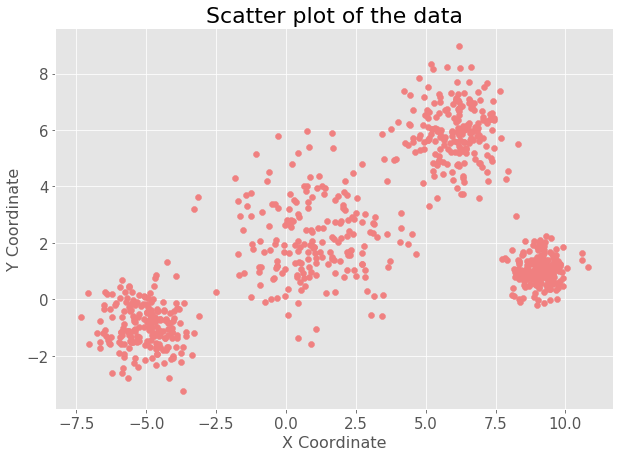

In [2]:
# Creating centers
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)

# Generating data randomly
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

# Concatenating the data arrays in one big array
data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

# Plotting an empty figure
plt.figure(figsize = (10,7))

# Plotting data points
plt.scatter(data[:,0], data[:,1], c = "lightcoral")

# Plot title, xlabel and ylabel
plt.title("Scatter plot of the data")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

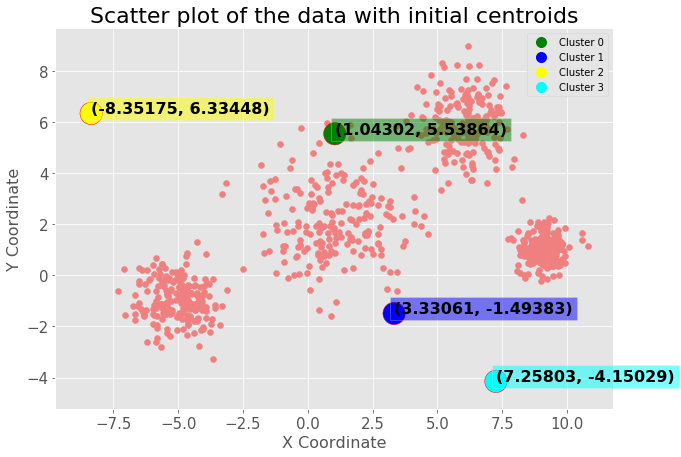

In [3]:
# No of cluster are 4
k = 4

# No of features are 2
c = 2

# Calculating standard deviation and mean for the data
std = data.std()
mean = data.mean()

# Setting the random seed to 6 for reproducibility
np.random.seed(6)

# Creating centroids
centroids = np.random.randn(k,c) * std + mean

# Creating dataframe from centroids
centroid_df = pd.DataFrame(centroids)
centroid_df.index.name = "cluster"

# Colors for coordinates
colors = ["green", "blue", "yellow", "cyan"]

# Plotting an empty figure
plt.figure(figsize = (10,7))

# Plotting data points
plt.scatter(data[:,0], data[:,1], c = "lightcoral")

# Plotting cluster centroids
plt.scatter(centroids[:,0], centroids[:,1], c = colors, edgecolors = "red", s = 500)

# Putting centroid coordinates on the plot
custfun.put_coordinates(df = centroid_df, c = colors)

# Plotting the legend for the plot
patches = [ plt.plot([],[], marker = "o", ms = 10, ls = "", mec = None, color = colors[i], 
            label = "Cluster " + str(i))[0]  for i in range(len(colors)) ]
plt.legend(handles = patches, loc = 'upper right', ncol = 1)

# Plot title, xlabel and ylabel
plt.title("Scatter plot of the data with initial centroids")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

# Saving plot for a slideshow
plt.savefig('./html/images/0.png', bbox_inches = "tight")

plt.show()

## 2. Visualise the clustering results in each iteration

## How Kmeans works?

<p style="font-size:16px">I. <b>Initialization</b> - First step is to randomly assign centroid for the clusters. This is typically done by randomly choosing K(here 4) points from the input set(we have created 4 centroids it using standard deviation and mean of the data in the above cell).</p>

<p style="font-size:16px">II. <b>Cluster Assignment</b> - Here each observation(each data point) is assigned to cluster centroid such that <u>Within Cluster Sum of Squares</u> is minimum or <u>Between Cluster Sum of Square</u> is maximum. Various metrics can be used to calculate similarities/dissimilarities between data points. This generally means assigning the data point to the closest centroid point. Here I have used Euclidean distance, which goes like following. </p>

<p style="font-size:16px"> 
$$ d(P, C) =  \sqrt{(x_{1} - X)^2 + (y_{1} - Y)^2} $$
    where $(x_{1}, y_{1})$  is an observation point($P$) and $(X, Y)$ is a centroid point($C$).
</p>

<p style="font-size:16px">III. <b>Centroid Update</b> - After all the points or observations are assigned to the centroids, each centroid is computed again. Here we are using Kmeans that's why new centroids will be computed by averaging(taking mean) the observation or data points which were assigned to the centroids in the <b>II</b> step. <b>[You can see that centroid are being pulled by data points]</b></p>

<p style="font-size:16px">IV. <b>Convergence</b> - Step <b>II</b> and <b>III</b> are repeated until the algorithm converges or some criterion is reached. There are several ways to detect convergence. The most typical way is to run until none of the observations change cluster membership(used here).</p>


<p style="font-size:16px"><b>Extras</b> - Kmeans often gives local minima(not the best solution/not the optimal solution). To overcome this, Kmeans is run for several times each time taking a different set of initial random centroids.</p>


In [4]:
data_df = pd.DataFrame(data)
current_centroids = pd.DataFrame(centroids)
current_centroids.index.name = "cluster"
previous_centroids = pd.DataFrame()
clusters = pd.DataFrame()

# First Iteration

Centroids are same -> False
Previous centroids
+-----------+----------+----------+
|   cluster |        0 |        1 |
|-----------+----------+----------|
|         0 |  1.04302 |  5.53864 |
|         1 |  3.33061 | -1.49383 |
|         2 | -8.35175 |  6.33448 |
|         3 |  7.25803 | -4.15029 |
+-----------+----------+----------+
Current centroids
+-----------+----------+-----------+
|   cluster |        0 |         1 |
|-----------+----------+-----------|
|         0 |  3.99621 |  4.82013  |
|         1 | -1.08109 | -0.147156 |
|         2 | -5.54024 | -0.689604 |
|         3 |  9.09423 |  1.02197  |
+-----------+----------+-----------+


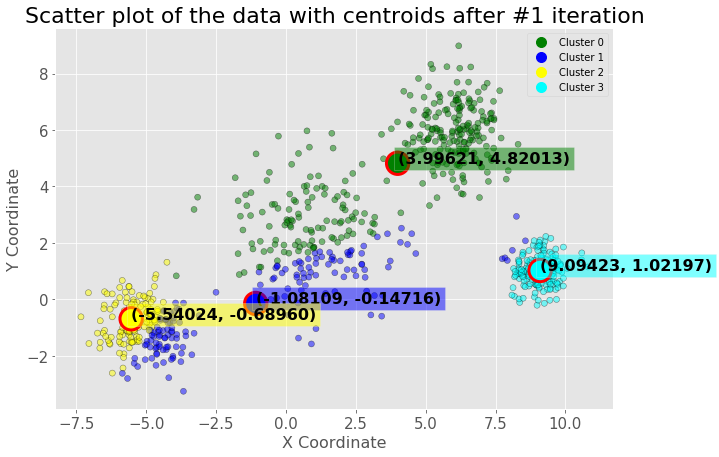

In [5]:
# Checking if both centroids are same or not
print("Centroids are same ->", current_centroids.equals(previous_centroids))

# For more detials about this function check used_function/custom_functions.py
current_centroids, previous_centroids = custfun.kmean_iteration(data = data_df, 
                                                        current_centroids_df = current_centroids, 
                                                        previous_centroids_df = previous_centroids)

# Second Iteration

Centroids are same -> False
Previous centroids
+-----------+----------+-----------+
|   cluster |        0 |         1 |
|-----------+----------+-----------|
|         0 |  3.99621 |  4.82013  |
|         1 | -1.08109 | -0.147156 |
|         2 | -5.54024 | -0.689604 |
|         3 |  9.09423 |  1.02197  |
+-----------+----------+-----------+
Current centroids
+-----------+----------+-----------+
|   cluster |        0 |         1 |
|-----------+----------+-----------|
|         0 |  4.90132 |  5.1503   |
|         1 |  0.24633 |  1.54337  |
|         2 | -5.07967 | -0.957539 |
|         3 |  9.05236 |  1.07946  |
+-----------+----------+-----------+


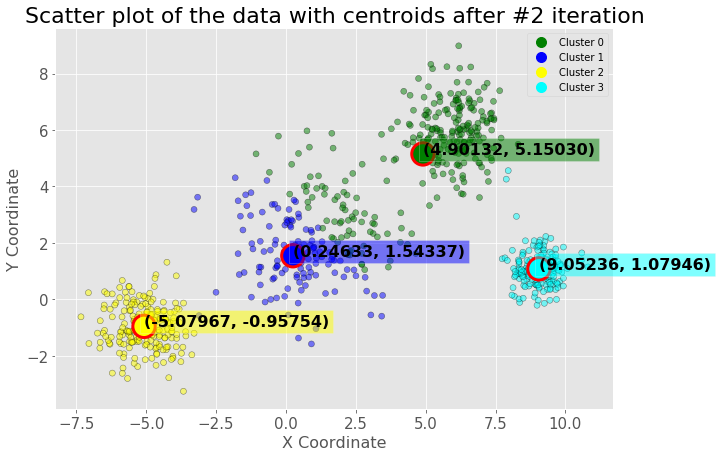

In [6]:
# Checking if both centroids are same or not
print("Centroids are same ->", current_centroids.equals(previous_centroids))

# For more detials about this function check used_function/custom_functions.py
current_centroids, previous_centroids = custfun.kmean_iteration(data = data_df, 
                                                        current_centroids_df = current_centroids, 
                                                        previous_centroids_df = previous_centroids)

# Third Iteration

Centroids are same -> False
Previous centroids
+-----------+----------+-----------+
|   cluster |        0 |         1 |
|-----------+----------+-----------|
|         0 |  4.90132 |  5.1503   |
|         1 |  0.24633 |  1.54337  |
|         2 | -5.07967 | -0.957539 |
|         3 |  9.05236 |  1.07946  |
+-----------+----------+-----------+
Current centroids
+-----------+-----------+----------+
|   cluster |         0 |        1 |
|-----------+-----------+----------|
|         0 |  5.76439  |  5.71757 |
|         1 |  0.771375 |  2.03201 |
|         2 | -5.05717  | -0.94967 |
|         3 |  9.06364  |  1.04634 |
+-----------+-----------+----------+


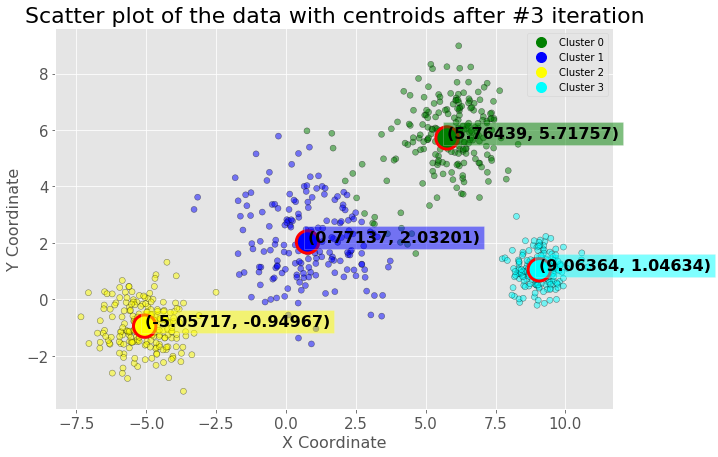

In [7]:
# Checking if both centroids are same or not
print("Centroids are same ->", current_centroids.equals(previous_centroids))

# For more detials about this function check used_function/custom_functions.py
current_centroids, previous_centroids = custfun.kmean_iteration(data = data_df, 
                                                        current_centroids_df = current_centroids, 
                                                        previous_centroids_df = previous_centroids)

# Forth Iteration

Centroids are same -> False
Previous centroids
+-----------+-----------+----------+
|   cluster |         0 |        1 |
|-----------+-----------+----------|
|         0 |  5.76439  |  5.71757 |
|         1 |  0.771375 |  2.03201 |
|         2 | -5.05717  | -0.94967 |
|         3 |  9.06364  |  1.04634 |
+-----------+-----------+----------+
Current centroids
+-----------+-----------+----------+
|   cluster |         0 |        1 |
|-----------+-----------+----------|
|         0 |  5.97244  |  5.88785 |
|         1 |  0.939731 |  2.1388  |
|         2 | -5.05717  | -0.94967 |
|         3 |  9.06364  |  1.04634 |
+-----------+-----------+----------+


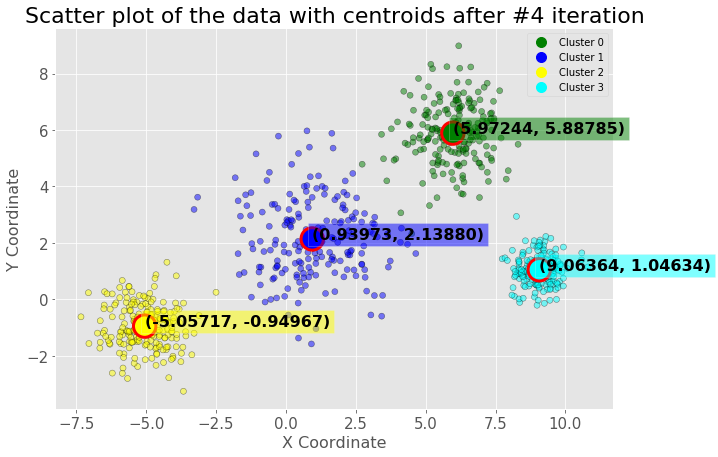

In [8]:
# Checking if both centroids are same or not
print("Centroids are same ->", current_centroids.equals(previous_centroids))

# For more detials about this function check used_function/custom_functions.py
current_centroids, previous_centroids = custfun.kmean_iteration(data = data_df, 
                                                        current_centroids_df = current_centroids, 
                                                        previous_centroids_df = previous_centroids)

# Fifth Iteration

Centroids are same -> False
Previous centroids
+-----------+-----------+----------+
|   cluster |         0 |        1 |
|-----------+-----------+----------|
|         0 |  5.97244  |  5.88785 |
|         1 |  0.939731 |  2.1388  |
|         2 | -5.05717  | -0.94967 |
|         3 |  9.06364  |  1.04634 |
+-----------+-----------+----------+
Current centroids
+-----------+-----------+----------+
|   cluster |         0 |        1 |
|-----------+-----------+----------|
|         0 |  6.00533  |  5.92529 |
|         1 |  0.982978 |  2.15788 |
|         2 | -5.05717  | -0.94967 |
|         3 |  9.06364  |  1.04634 |
+-----------+-----------+----------+


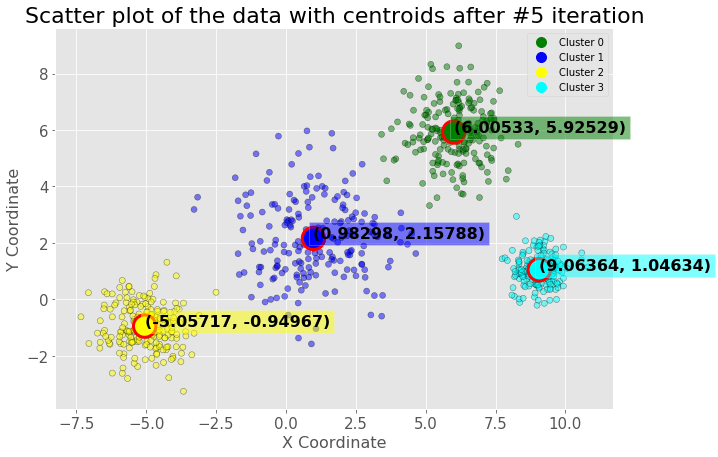

In [9]:
# Checking if both centroids are same or not
print("Centroids are same ->", current_centroids.equals(previous_centroids))

# For more detials about this function check used_function/custom_functions.py
current_centroids, previous_centroids = custfun.kmean_iteration(data = data_df, 
                                                        current_centroids_df = current_centroids, 
                                                        previous_centroids_df = previous_centroids)

# Sixth Iteration

Centroids are same -> False
Previous centroids
+-----------+-----------+----------+
|   cluster |         0 |        1 |
|-----------+-----------+----------|
|         0 |  6.00533  |  5.92529 |
|         1 |  0.982978 |  2.15788 |
|         2 | -5.05717  | -0.94967 |
|         3 |  9.06364  |  1.04634 |
+-----------+-----------+----------+
Current centroids
+-----------+-----------+----------+
|   cluster |         0 |        1 |
|-----------+-----------+----------|
|         0 |  6.00533  |  5.92529 |
|         1 |  0.982978 |  2.15788 |
|         2 | -5.05717  | -0.94967 |
|         3 |  9.06364  |  1.04634 |
+-----------+-----------+----------+


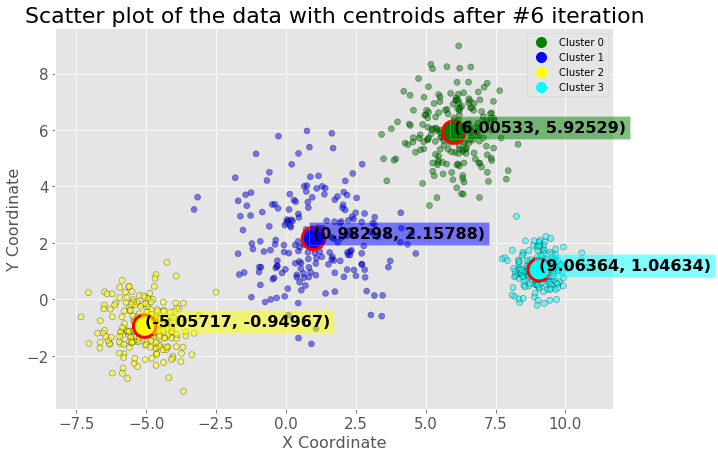

In [10]:
# Checking if both centroids are same or not
print("Centroids are same ->", current_centroids.equals(previous_centroids))

# For more detials about this function check used_function/custom_functions.py
current_centroids, previous_centroids = custfun.kmean_iteration(data = data_df, 
                                                        current_centroids_df = current_centroids, 
                                                        previous_centroids_df = previous_centroids)

# Seventh Iteration
### Not needed as centroids are same

In [11]:
# Checking if both centroids are same or not
print("Centroids are same ->", current_centroids.equals(previous_centroids))

Centroids are same -> True


## Look how centroids are changing in each iteration in the slideshow

In [12]:
# Find slideshow.html file in html folder of this portfolio
IPython.display.HTML(filename = './html/slideshow.html')